In [0]:
data = pd.read_csv('words_dataset.csv')
print(data)

data = data[0:798]
print(data)

data_labels = data['label']
data_words = data['word']

       id        word  label         0  ...       296       297       298       299
0     1.0      people    0.0  0.263672  ...  0.021118 -0.066895  0.207031 -0.138672
1     2.0  adaptation    0.0  0.261719  ... -0.143555  0.102539 -0.006042  0.289062
2     3.0       tribe    0.0 -0.082031  ... -0.086914 -0.172852  0.180664  0.009888
3     4.0   community    0.0 -0.171875  ... -0.088379 -0.153320  0.155273 -0.150391
4     5.0       child    0.0  0.165039  ... -0.045166 -0.006622 -0.154297  0.075684
...   ...         ...    ...       ...  ...       ...       ...       ...       ...
1033  NaN         NaN    NaN       NaN  ...       NaN       NaN       NaN       NaN
1034  NaN         NaN    NaN       NaN  ...       NaN       NaN       NaN       NaN
1035  NaN         NaN    NaN       NaN  ...       NaN       NaN       NaN       NaN
1036  NaN         NaN    NaN       NaN  ...       NaN       NaN       NaN       NaN
1037  NaN         NaN    NaN       NaN  ...       NaN       NaN       NaN   

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
793    9.0
794    9.0
795    9.0
796    9.0
797    9.0
Name: label, Length: 798, dtype: float64


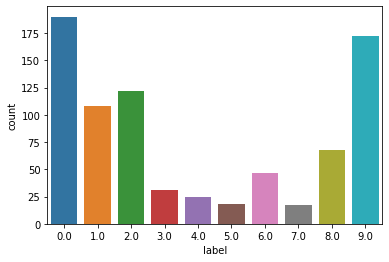

In [0]:
g = sns.countplot(data_labels)

data_labels.value_counts()

print(data_labels)

In [0]:
for i in data_words:
  if i == 'individuals':
    print('Present')
  

In [0]:
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
syn = []

for synset in wordnet.synsets("van"):
   for lemma in synset.lemmas():
      syn.append(lemma.name())
  
print(syn)

['avant-garde', 'vanguard', 'van', 'new_wave', 'vanguard', 'van', 'van', 'van', 'caravan', 'van']


In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
y = []
for i in sent:
  z = lemmatizer.lemmatize(str(i))
  if z not in y and z not in sent:
    y.append(z)
     
    
  

print(z)

people
adaptation
tribe
community
child
smile
temple
nan
hair
forehead
hairstyle
human
black
hair
neck
youth
rural
area
plant
play
village
school
male
leg
human
body
muscle
barechested
chest
flesh
shack
hut
jungle
nature
reserve
tree
rainforest
house
building
event
folk
dance
ritual
dance
festival
crowd
soil
tradition
moustache
facial
hair
photography
beard
tribal
chief
cuirass
viking
fictional
character
art
headgear
glass
ceremony
product
fan
carnival
public
event
fun
bunker
fortification
air
raid
shelter
grass
historic
site
archaeological
site
state
park
land
lot
concrete
facial
expression
skin
mouth
snout
organism
wrinkle
food
cuisine
turban
dastar
elder
team
musician
style
head
bodybuilding
movie
adventure
lady
jewellery
dreadlock
nature
wildlife
landscape
wood
forest
old
growth
forest
trunk
straw
hay
grass
family
agriculture
farmer
bamboo
terrestrial
plant
werewolf
clown
eyewear
parade
flag
selfie
vacation
fishing
recreation
board
short
recreational
fishing
fish
christmas
holiday


In [0]:
import datetime
import numpy as np
import os
import pandas as pd

import gensim
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec

import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd My Drive
%cd dssm_lstm

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
/gdrive/My Drive
/gdrive/My Drive/dssm_lstm


In [0]:
'''fp = open("GoogleNews-vectors-negative300.bin", "wb")
import gzip
with gzip.open("GoogleNews-vectors-negative300.bin.gz", "rb") as f:
  bindata = f.read()
fp.write(bindata)
fp.close()'''

KeyboardInterrupt: ignored

In [0]:
df = pd.read_csv('1.labels.csv',encoding='iso-8859-1')
df_words = df[['label1','label2','label3','label4','label5','label6','label7','label8','label9','label10']]
print(df_words)

       label1      label2      label3  ...          label8       label9    label10
0      People  Adaptation       Tribe  ...             NaN          NaN        NaN
1        Hair      People    Forehead  ...      Adaptation       Temple       Neck
2      People   Community  Adaptation  ...            Play      Village     School
3        Male         Leg  Human body  ...             NaN          NaN        NaN
4       Shack         Hut      Jungle  ...      Rural area        House   Building
..        ...         ...         ...  ...             ...          ...        ...
995      Food      Sorbet        Dish  ...  Frozen dessert     Beetroot        NaN
996  Dishware       Plate      Saucer  ...             Cup    Porcelain    Platter
997      Food     Cuisine        Dish  ...          Sorbet    Ice cream     Recipe
998      Meal        Food  Still life  ...          Brunch  Finger food  Serveware
999      Food        Dish     Cuisine  ...             NaN          NaN        NaN

[10

In [0]:
df_words = df_words.transpose()

In [0]:
for col in df_words.columns:
    print(df_words[col].tolist())

['People', 'Adaptation', 'Tribe', 'Community', 'Child', 'Smile', 'Temple', nan, nan, nan]
['Hair', 'People', 'Forehead', 'Hairstyle', 'Human', 'Black hair', 'Smile', 'Adaptation', 'Temple', 'Neck']
['People', 'Community', 'Adaptation', 'Child', 'Youth', 'Rural area', 'Plant', 'Play', 'Village', 'School']
['Male', 'Leg', 'Human body', 'Muscle', 'Barechested', 'Chest', 'Flesh', nan, nan, nan]
['Shack', 'Hut', 'Jungle', 'Nature reserve', 'Tree', 'Rainforest', 'Adaptation', 'Rural area', 'House', 'Building']
['People', 'Tribe', 'Event', 'Folk dance', 'Ritual', 'Adaptation', 'Dance', 'Festival', 'Crowd', nan]
['People', 'Community', 'Adaptation', 'Child', 'Soil', 'Human', 'Rural area', 'Event', 'Plant', 'Temple']
['People', 'Tribe', 'Forehead', 'Tradition', 'Moustache', 'Facial hair', 'Photography', 'Adaptation', 'Beard', 'Tribal chief']
['People', 'Tribe', 'Cuirass', 'Viking', 'Fictional character', 'Art', nan, nan, nan, nan]
['People', 'Human', 'Tradition', 'Tribe', 'Headgear', 'Adaptatio

In [0]:
x = []
for col in df_words.columns:
  if col=='0':
    x = df_words[col].tolist()
  else:
    x = x + df_words[col].tolist()

print(x)
  

['People', 'Adaptation', 'Tribe', 'Community', 'Child', 'Smile', 'Temple', nan, nan, nan, 'Hair', 'People', 'Forehead', 'Hairstyle', 'Human', 'Black hair', 'Smile', 'Adaptation', 'Temple', 'Neck', 'People', 'Community', 'Adaptation', 'Child', 'Youth', 'Rural area', 'Plant', 'Play', 'Village', 'School', 'Male', 'Leg', 'Human body', 'Muscle', 'Barechested', 'Chest', 'Flesh', nan, nan, nan, 'Shack', 'Hut', 'Jungle', 'Nature reserve', 'Tree', 'Rainforest', 'Adaptation', 'Rural area', 'House', 'Building', 'People', 'Tribe', 'Event', 'Folk dance', 'Ritual', 'Adaptation', 'Dance', 'Festival', 'Crowd', nan, 'People', 'Community', 'Adaptation', 'Child', 'Soil', 'Human', 'Rural area', 'Event', 'Plant', 'Temple', 'People', 'Tribe', 'Forehead', 'Tradition', 'Moustache', 'Facial hair', 'Photography', 'Adaptation', 'Beard', 'Tribal chief', 'People', 'Tribe', 'Cuirass', 'Viking', 'Fictional character', 'Art', nan, nan, nan, nan, 'People', 'Human', 'Tradition', 'Tribe', 'Headgear', 'Adaptation', 'Glas

In [0]:
df_words = pd.DataFrame(x)
print(df_words)

               0
0         People
1     Adaptation
2          Tribe
3      Community
4          Child
...          ...
9995      Recipe
9996     Produce
9997         NaN
9998         NaN
9999         NaN

[10000 rows x 1 columns]


In [0]:
df_words.columns = ['words']
x = df_words['words'].unique()
print(x)


['People' 'Adaptation' 'Tribe' 'Community' 'Child' 'Smile' 'Temple' nan
 'Hair' 'Forehead' 'Hairstyle' 'Human' 'Black hair' 'Neck' 'Youth'
 'Rural area' 'Plant' 'Play' 'Village' 'School' 'Male' 'Leg' 'Human body'
 'Muscle' 'Barechested' 'Chest' 'Flesh' 'Shack' 'Hut' 'Jungle'
 'Nature reserve' 'Tree' 'Rainforest' 'House' 'Building' 'Event'
 'Folk dance' 'Ritual' 'Dance' 'Festival' 'Crowd' 'Soil' 'Tradition'
 'Moustache' 'Facial hair' 'Photography' 'Beard' 'Tribal chief' 'Cuirass'
 'Viking' 'Fictional character' 'Art' 'Headgear' 'Glasses' 'Ceremony'
 'Product' 'Fan' 'Carnival' 'Public event' 'Fun' 'Bunker' 'Fortification'
 'Air-raid shelter' 'Grass' 'Historic site' 'Archaeological site'
 'State park' 'Land lot' 'Concrete' 'Facial expression' 'Skin' 'Mouth'
 'Snout' 'Organism' 'Wrinkle' 'Food' 'Cuisine' 'Turban' 'Dastar' 'Elder'
 'Team' 'Musician' 'Style' 'Head' 'Bodybuilding' 'Movie' 'Adventure'
 'Lady' 'Jewellery' 'Dreadlocks' 'Nature' 'Wildlife' 'Landscape' 'Wood'
 'Forest' 'Old-growth

In [0]:
string = ' '
for i in x:
  string = string + str(i) + ' '

In [0]:
print(string)

 People Adaptation Tribe Community Child Smile Temple nan Hair Forehead Hairstyle Human Black hair Neck Youth Rural area Plant Play Village School Male Leg Human body Muscle Barechested Chest Flesh Shack Hut Jungle Nature reserve Tree Rainforest House Building Event Folk dance Ritual Dance Festival Crowd Soil Tradition Moustache Facial hair Photography Beard Tribal chief Cuirass Viking Fictional character Art Headgear Glasses Ceremony Product Fan Carnival Public event Fun Bunker Fortification Air-raid shelter Grass Historic site Archaeological site State park Land lot Concrete Facial expression Skin Mouth Snout Organism Wrinkle Food Cuisine Turban Dastar Elder Team Musician Style Head Bodybuilding Movie Adventure Lady Jewellery Dreadlocks Nature Wildlife Landscape Wood Forest Old-growth forest Trunk Straw Hay Grass family Agriculture Farmer Bamboo Terrestrial plant Werewolf Clown Eyewear Parade Flag Selfie Vacation Fishing Recreation board short Recreational fishing Fish Christmas Holi

In [0]:
import bs4 as bs
import urllib.request
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# Cleaing the text
processed_article = string.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_article)

for sent in all_sentences:
  sent = nltk.word_tokenize(sent)
  print(sent)

#all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

all_words = sent

stop =[]
# Removing Stop Words
from nltk.corpus import stopwords
for i in range(len(all_words)):
  if all_words[i] in stopwords.words('english'):
    stop.append(all_words[i])

for i in stop:
  all_words.remove(i)

print(all_words)

sent = all_words
print(len(sent))

['people', 'adaptation', 'tribe', 'community', 'child', 'smile', 'temple', 'nan', 'hair', 'forehead', 'hairstyle', 'human', 'black', 'hair', 'neck', 'youth', 'rural', 'area', 'plant', 'play', 'village', 'school', 'male', 'leg', 'human', 'body', 'muscle', 'barechested', 'chest', 'flesh', 'shack', 'hut', 'jungle', 'nature', 'reserve', 'tree', 'rainforest', 'house', 'building', 'event', 'folk', 'dance', 'ritual', 'dance', 'festival', 'crowd', 'soil', 'tradition', 'moustache', 'facial', 'hair', 'photography', 'beard', 'tribal', 'chief', 'cuirass', 'viking', 'fictional', 'character', 'art', 'headgear', 'glasses', 'ceremony', 'product', 'fan', 'carnival', 'public', 'event', 'fun', 'bunker', 'fortification', 'air', 'raid', 'shelter', 'grass', 'historic', 'site', 'archaeological', 'site', 'state', 'park', 'land', 'lot', 'concrete', 'facial', 'expression', 'skin', 'mouth', 'snout', 'organism', 'wrinkle', 'food', 'cuisine', 'turban', 'dastar', 'elder', 'team', 'musician', 'style', 'head', 'bodyb

In [0]:
# Cleaing the text
processed_article = string.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_article)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words
from nltk.corpus import stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [0]:
print(all_words)

[['people', 'adaptation', 'tribe', 'community', 'child', 'smile', 'temple', 'nan', 'hair', 'forehead', 'hairstyle', 'human', 'black', 'hair', 'neck', 'youth', 'rural', 'area', 'plant', 'play', 'village', 'school', 'male', 'leg', 'human', 'body', 'muscle', 'barechested', 'chest', 'flesh', 'shack', 'hut', 'jungle', 'nature', 'reserve', 'tree', 'rainforest', 'house', 'building', 'event', 'folk', 'dance', 'ritual', 'dance', 'festival', 'crowd', 'soil', 'tradition', 'moustache', 'facial', 'hair', 'photography', 'beard', 'tribal', 'chief', 'cuirass', 'viking', 'fictional', 'character', 'art', 'headgear', 'glasses', 'ceremony', 'product', 'fan', 'carnival', 'public', 'event', 'fun', 'bunker', 'fortification', 'air', 'raid', 'shelter', 'grass', 'historic', 'site', 'archaeological', 'site', 'state', 'park', 'land', 'lot', 'concrete', 'facial', 'expression', 'skin', 'mouth', 'snout', 'organism', 'wrinkle', 'food', 'cuisine', 'turban', 'dastar', 'elder', 'team', 'musician', 'style', 'head', 'body

In [0]:
import gensim


'''%ls
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True) 
'''
from gensim.models import Word2Vec
word2vec = Word2Vec(all_words, min_count=1)

In [0]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'people': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3e10>, 'adaptation': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3d68>, 'tribe': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3e80>, 'community': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3ef0>, 'child': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3240>, 'smile': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3208>, 'temple': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce31d0>, 'nan': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3f28>, 'hair': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3fd0>, 'forehead': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3f60>, 'hairstyle': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3f98>, 'human': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3eb8>, 'black': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3128>, 'neck': <gensim.models.keyedvectors.Vocab object at 0x7f21e7ce3198>, 'yout

In [0]:
v1 = word2vec.wv['bus']
print(v1)

[-0.00056385  0.00292584 -0.0049189   0.00308667 -0.0042393   0.00464086
 -0.00050558 -0.00037227  0.0014901   0.00303642 -0.00169863 -0.0008566
 -0.00234515 -0.001685    0.00125078  0.00372553 -0.00216303  0.00215794
  0.00107082  0.00229555  0.00112746 -0.0003838  -0.00229425  0.00191331
 -0.0014298  -0.00125465  0.00167891 -0.00390167  0.00263232  0.00376798
 -0.00303494 -0.00160161 -0.00269826 -0.00260052 -0.00266956 -0.00102698
  0.00405826  0.00409493  0.00447468 -0.00377371  0.00374203 -0.00266273
  0.00389793 -0.00482654 -0.0026724  -0.00230981  0.00132958 -0.00357419
 -0.00365068 -0.00139175  0.00198738 -0.00029023 -0.00201542 -0.00160335
 -0.00104709  0.00437682 -0.00245926  0.00342403  0.00493087 -0.00147566
 -0.0007492   0.00276437 -0.00367387 -0.00262009  0.00181705 -0.00162551
 -0.00382625 -0.00184661  0.00337164  0.00465694 -0.00239877 -0.00442009
  0.00392421 -0.00410867 -0.00372611  0.0007948  -0.00405931 -0.00197836
  0.00139727  0.00012266 -0.00014432  0.00159     0.

In [0]:
v2 = v1.reshape(-1,1)
print(v2)

[[-0.00056385]
 [ 0.00292584]
 [-0.0049189 ]
 [ 0.00308667]
 [-0.0042393 ]
 [ 0.00464086]
 [-0.00050558]
 [-0.00037227]
 [ 0.0014901 ]
 [ 0.00303642]
 [-0.00169863]
 [-0.0008566 ]
 [-0.00234515]
 [-0.001685  ]
 [ 0.00125078]
 [ 0.00372553]
 [-0.00216303]
 [ 0.00215794]
 [ 0.00107082]
 [ 0.00229555]
 [ 0.00112746]
 [-0.0003838 ]
 [-0.00229425]
 [ 0.00191331]
 [-0.0014298 ]
 [-0.00125465]
 [ 0.00167891]
 [-0.00390167]
 [ 0.00263232]
 [ 0.00376798]
 [-0.00303494]
 [-0.00160161]
 [-0.00269826]
 [-0.00260052]
 [-0.00266956]
 [-0.00102698]
 [ 0.00405826]
 [ 0.00409493]
 [ 0.00447468]
 [-0.00377371]
 [ 0.00374203]
 [-0.00266273]
 [ 0.00389793]
 [-0.00482654]
 [-0.0026724 ]
 [-0.00230981]
 [ 0.00132958]
 [-0.00357419]
 [-0.00365068]
 [-0.00139175]
 [ 0.00198738]
 [-0.00029023]
 [-0.00201542]
 [-0.00160335]
 [-0.00104709]
 [ 0.00437682]
 [-0.00245926]
 [ 0.00342403]
 [ 0.00493087]
 [-0.00147566]
 [-0.0007492 ]
 [ 0.00276437]
 [-0.00367387]
 [-0.00262009]
 [ 0.00181705]
 [-0.00162551]
 [-0.00382

In [0]:
sim_words = word2vec.wv.most_similar('people')
print(sim_words)

[('stallion', 0.27080339193344116), ('surface', 0.2601495385169983), ('massif', 0.2516082525253296), ('driftwood', 0.2515638470649719), ('rib', 0.23980462551116943), ('viking', 0.23742759227752686), ('selling', 0.2324356734752655), ('pony', 0.22709378600120544), ('celestial', 0.21651335060596466), ('cart', 0.2091074287891388)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
%ls
df = pd.DataFrame(sent)
print(df)

1.labels.csv                           synonyms.csv        vocab_A.wl
CNN.csv                                synonymsx.csv       vocab_Q.wl
GoogleNews-vectors-negative300.bin     synonymsxx.csv      words.csv
GoogleNews-vectors-negative300.bin.gz  train.pair.tok.ctf  words_dataset.csv
news_word_corr.csv                     valid.pair.tok.ctf
synonyms_corr.csv                      vectors.csv
               0
0         people
1     adaptation
2          tribe
3      community
4          child
...          ...
1035         cup
1036   porcelain
1037     granita
1038         ice
1039       cream

[1040 rows x 1 columns]


In [0]:
df.columns = ['words']
x = df['words'].unique()
print(x)

['people' 'adaptation' 'tribe' 'community' 'child' 'smile' 'temple' 'nan'
 'hair' 'forehead' 'hairstyle' 'human' 'black' 'neck' 'youth' 'rural'
 'area' 'plant' 'play' 'village' 'school' 'male' 'leg' 'body' 'muscle'
 'barechested' 'chest' 'flesh' 'shack' 'hut' 'jungle' 'nature' 'reserve'
 'tree' 'rainforest' 'house' 'building' 'event' 'folk' 'dance' 'ritual'
 'festival' 'crowd' 'soil' 'tradition' 'moustache' 'facial' 'photography'
 'beard' 'tribal' 'chief' 'cuirass' 'viking' 'fictional' 'character' 'art'
 'headgear' 'glasses' 'ceremony' 'product' 'fan' 'carnival' 'public' 'fun'
 'bunker' 'fortification' 'air' 'raid' 'shelter' 'grass' 'historic' 'site'
 'archaeological' 'state' 'park' 'land' 'lot' 'concrete' 'expression'
 'skin' 'mouth' 'snout' 'organism' 'wrinkle' 'food' 'cuisine' 'turban'
 'dastar' 'elder' 'team' 'musician' 'style' 'head' 'bodybuilding' 'movie'
 'adventure' 'lady' 'jewellery' 'dreadlocks' 'wildlife' 'landscape' 'wood'
 'forest' 'old' 'growth' 'trunk' 'straw' 'hay' 'fam

In [0]:
df = pd.DataFrame(x)
print(df)
df.to_csv('words.csv')

              0
0        people
1    adaptation
2         tribe
3     community
4         child
..          ...
793   serveware
794   tableware
795         cup
796   porcelain
797     granita

[798 rows x 1 columns]


In [0]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

vec_king = wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
print (wv.most_similar(positive=['meat'], negative=[], topn=10))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('meats', 0.8006241917610168), ('beef', 0.7286376953125), ('pork', 0.7186977863311768), ('chicken', 0.6799130439758301), ('veal', 0.6654439568519592), ('Meat', 0.6618024706840515), ('lamb', 0.6480674147605896), ('venison', 0.643023669719696), ('steaks', 0.6292669773101807), ('processed_meats', 0.6270483732223511)]


In [0]:
for i in data_words:
  if i == '':
    print('Present')

In [0]:
print(x)
cnt=0
for word in x:
  z = []
  print(cnt)
  if word in wv.vocab:
    z.append(wv[word].tolist())
    if cnt==0:
      df1 = pd.DataFrame(z)
      print(df1)
    else:
      df2 = pd.DataFrame(z)
      df1 = df1.append(df2,ignore_index=True)
  else:
    z.append([0]*300)
    df2 = pd.DataFrame(z)
    df1 = df1.append(df2,ignore_index=True)
  cnt = cnt+1
  


['people' 'adaptation' 'tribe' 'community' 'child' 'smile' 'temple' 'nan'
 'hair' 'forehead' 'hairstyle' 'human' 'black' 'neck' 'youth' 'rural'
 'area' 'plant' 'play' 'village' 'school' 'male' 'leg' 'body' 'muscle'
 'barechested' 'chest' 'flesh' 'shack' 'hut' 'jungle' 'nature' 'reserve'
 'tree' 'rainforest' 'house' 'building' 'event' 'folk' 'dance' 'ritual'
 'festival' 'crowd' 'soil' 'tradition' 'moustache' 'facial' 'photography'
 'beard' 'tribal' 'chief' 'cuirass' 'viking' 'fictional' 'character' 'art'
 'headgear' 'glasses' 'ceremony' 'product' 'fan' 'carnival' 'public' 'fun'
 'bunker' 'fortification' 'air' 'raid' 'shelter' 'grass' 'historic' 'site'
 'archaeological' 'state' 'park' 'land' 'lot' 'concrete' 'expression'
 'skin' 'mouth' 'snout' 'organism' 'wrinkle' 'food' 'cuisine' 'turban'
 'dastar' 'elder' 'team' 'musician' 'style' 'head' 'bodybuilding' 'movie'
 'adventure' 'lady' 'jewellery' 'dreadlocks' 'wildlife' 'landscape' 'wood'
 'forest' 'old' 'growth' 'trunk' 'straw' 'hay' 'fam

In [0]:
print(df1)

          0         1         2    ...       297       298       299
0    0.263672 -0.019165  0.028931  ... -0.066895  0.207031 -0.138672
1    0.261719 -0.080566 -0.208008  ...  0.102539 -0.006042  0.289062
2   -0.082031 -0.159180  0.051270  ... -0.172852  0.180664  0.009888
3   -0.171875 -0.047119  0.016846  ... -0.153320  0.155273 -0.150391
4    0.165039 -0.063965 -0.001785  ... -0.006622 -0.154297  0.075684
..        ...       ...       ...  ...       ...       ...       ...
793 -0.206055 -0.021729 -0.048584  ... -0.151367  0.233398  0.085938
794 -0.218750  0.029053 -0.048096  ... -0.044189  0.378906  0.025391
795 -0.292969 -0.078125  0.023071  ... -0.184570 -0.038330  0.291016
796 -0.176758  0.259766 -0.107422  ...  0.310547  0.298828 -0.121582
797 -0.129883 -0.201172  0.318359  ... -0.030029  0.201172  0.048828

[798 rows x 300 columns]


In [0]:
df1.to_csv('vectors.csv')

In [0]:
#print(x)
cnt=0
for word in x:
  z = []
  if word in wv.vocab:
    #print(type(wv[word]))
    if cnt==0:
      df1 = pd.DataFrame(wv)
      #print(df1)
    else:
      df2 = pd.DataFrame(z)
      df1 = df1.append(df2,ignore_index=True)
  else:
    z.append([0]*300)
    df2 = pd.DataFrame(z)
    df1 = df1.append(df2,ignore_index=True)
  cnt = cnt+1
  break

print(df1)

ValueError: ignored